<a href="https://colab.research.google.com/github/AhmedAnasHaouari/sales-predictions/blob/main/Sales_predictions_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **PROJECT 1** :

- Haouari Ahmed Anas

# Part 1 :

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
filename = "/content/drive/MyDrive/datasets/sales_predictions_2023.csv"

df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Part 2 :

- Question 1

In [4]:
df.shape

(8523, 12)

There are 8523 raws and 12 columns

- Question 2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Datatypes are described in the output above

- Question 3

In [6]:
df.duplicated().sum()

0

There are no duplicates in this dataframe

- Question 4

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The ‘Item_Weight’ column has 1463 missing values, the ‘Outlet_Size’ column has 2410 missing values

- Question 5 : Item_Weight

In [8]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [9]:
df.groupby(['Outlet_Size'])['Item_Weight'].mean()

Outlet_Size
High      13.006148
Medium    12.895420
Small     12.848075
Name: Item_Weight, dtype: float64

In [10]:
df.groupby(['Item_Type'])['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

It looks like there is no clear correlation between other features and Item_Weight.


In [11]:
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)


Replacing missing values with the mean average is a good choice for float values. Even though it doesn’t factor the correlations between features; it's an easy and fast way that can Work well with small numerical datasets.

- Question 5 : Outlet_Size

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df.groupby(['Outlet_Size'])['Item_Fat_Content'].value_counts()

Outlet_Size  Item_Fat_Content
High         Low Fat              556
             Regular              313
             LF                    32
             low fat               18
             reg                   13
Medium       Low Fat             1660
             Regular              952
             LF                   105
             reg                   42
             low fat               34
Small        Low Fat             1425
             Regular              811
             LF                    96
             low fat               29
             reg                   27
Name: Item_Fat_Content, dtype: int64

In [14]:
df.groupby(['Item_Type'])['Outlet_Size'].value_counts()

Item_Type              Outlet_Size
Baking Goods           Medium         203
                       Small          187
                       High            73
Breads                 Medium          83
                       Small           71
                       High            25
Breakfast              Medium          36
                       Small           30
                       High            13
Canned                 Medium         217
                       Small          189
                       High            65
Dairy                  Medium         218
                       Small          198
                       High            80
Frozen Foods           Medium         274
                       Small          249
                       High            92
Fruits and Vegetables  Medium         413
                       Small          328
                       High           142
Hard Drinks            Medium          75
                       Small           50

There is no correlation helping as in predicting values that are missing for the Outlet_Size column. And there is no value that is overwhelmingly more common than the other values
So we can fill missing data with a new category "missing" and that will help as not loosing any data by droping missing raws.

In [15]:
df['Outlet_Size'].fillna('Missing', inplace=True)

- Question 6

In [16]:
# Checking
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Question 7

In [17]:
# Check for Inconsistencies for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')


In [19]:
# Check for Inconsistencies for Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [20]:
# Check for Inconsistencies for Outlet_Size
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [21]:
# Check for Inconsistencies for Outlet_Location_Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
# Check for Inconsistencies for Outlet_Identifier
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

- Question 8 :

In [23]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Part 3, 4 :

- Histograms

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

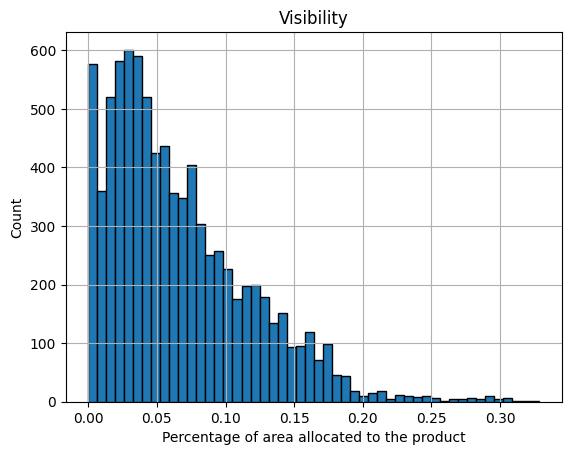

In [25]:
df['Item_Visibility'].hist(bins= 'auto',edgecolor='k')
plt.title('Visibility')
plt.xlabel('Percentage of area allocated to the product')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

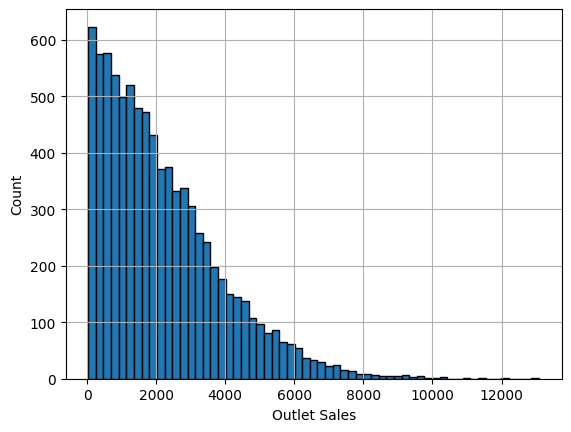

In [26]:
df['Item_Outlet_Sales'].hist(bins= 'auto',edgecolor='k')
plt.xlabel('Outlet Sales')
plt.ylabel('Count')

 - Boxplots

([], [])

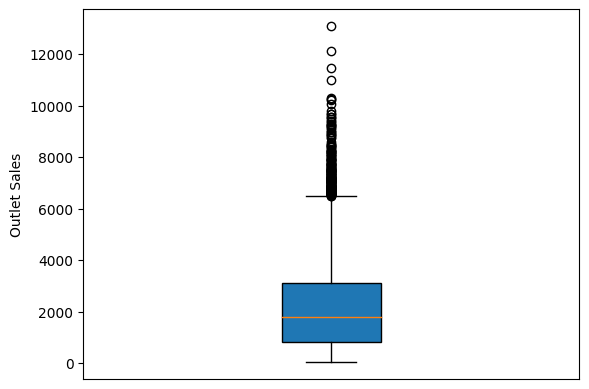

In [27]:
plt.boxplot(df['Item_Outlet_Sales'], widths = .2, patch_artist=True)
plt.ylabel('Outlet Sales', fontsize = 10);
plt.xticks([])

Text(0.5, 1.0, 'Sales by MRP')

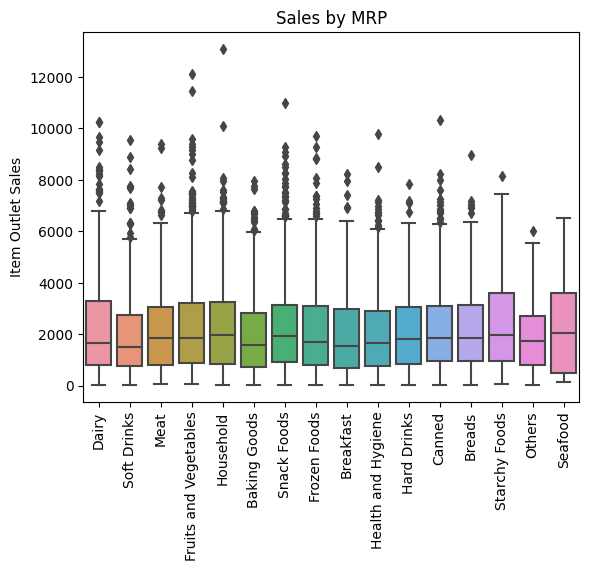

In [28]:
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.ylabel('Item Outlet Sales')
plt.xlabel('')
plt.title('Sales by MRP')

Text(0, 0.5, 'Outlet sales')

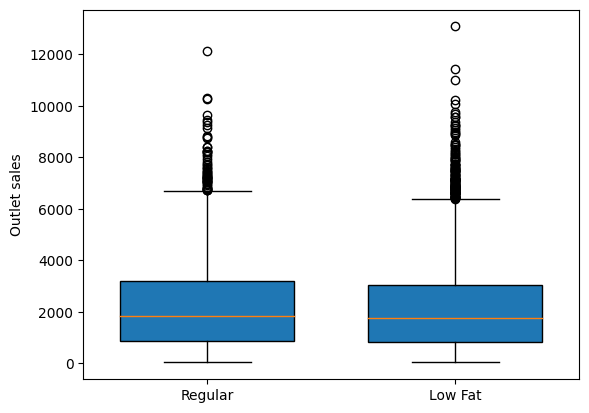

In [29]:
Regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales'].values
Low = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales'].values
plt.boxplot([Regular, Low], labels=['Regular','Low Fat'], widths = 0.7, patch_artist=True)
plt.ylabel('Outlet sales')

- Heatmap

In [30]:
corr_df = df.corr()
corr_df

<ipython-input-30-e9476d57cd4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

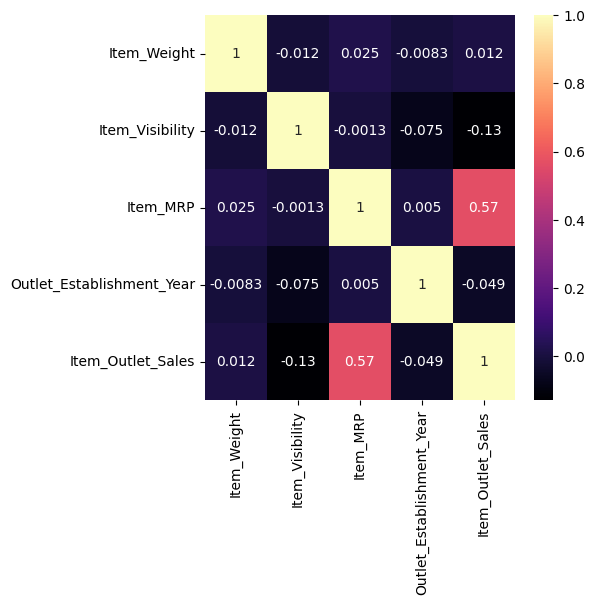

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_df, cmap='magma', annot=True)

# Part 4

In [32]:
intervales = [0, 100, 200, 300]
etiquettes = ['MRP < 100', '100 < MRP < 200', 'MRP > 200']
df['Item_MRP_groupes'] = pd.cut(df['Item_MRP'], bins=intervales, labels=etiquettes)
df.insert(7, 'Item_MRP_groupes', df.pop('Item_MRP_groupes'))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_MRP_groupes,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,MRP > 200,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,MRP < 100,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,100 < MRP < 200,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,100 < MRP < 200,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,MRP < 100,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,MRP > 200,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,100 < MRP < 200,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,MRP < 100,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,100 < MRP < 200,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [33]:
intervales = [-1, 0.1, 0.2, 0.4]
etiquettes = ['Visibility < 10%', '%10 < Visibility < %20', '%20 <  Visibility']
df['Item_Visibility_groupes'] = pd.cut(df['Item_Visibility'], bins=intervales, labels=etiquettes)
df.insert(4, 'Item_Visibility_groupes', df.pop('Item_Visibility_groupes'))

<ipython-input-35-013f304073ba>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


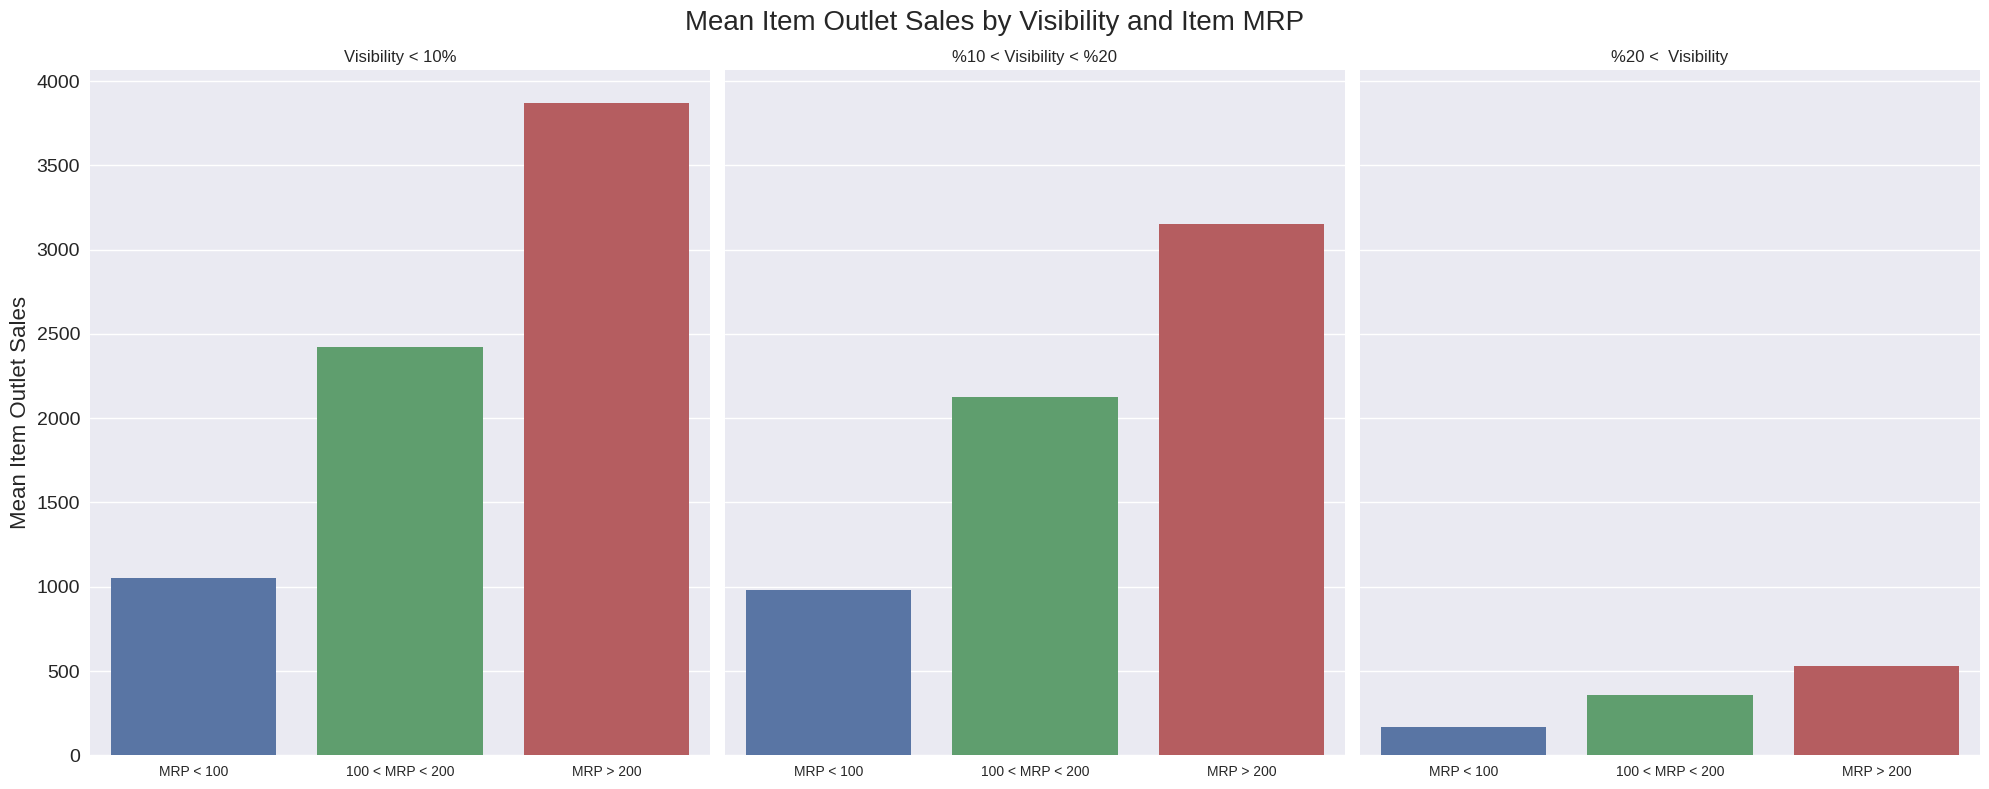

In [35]:
Sells_by_Item = df.groupby(['Item_MRP_groupes', 'Item_Visibility_groupes'])['Item_Outlet_Sales'].mean()
plot_data = Sells_by_Item.unstack()
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Mean Item Outlet Sales by Visibility and Item MRP', fontsize=20)
plt.style.use('seaborn')
sns.barplot(x=plot_data.index, y=plot_data['Visibility < 10%'], ax=axes[0])
axes[0].set_title('Visibility < 10%')

sns.barplot(x=plot_data.index, y=plot_data['%10 < Visibility < %20'], ax=axes[1])
axes[1].set_title('%10 < Visibility < %20')

sns.barplot(x=plot_data.index, y=plot_data['%20 <  Visibility'], ax=axes[2])
axes[2].set_title('%20 <  Visibility')


for ax in axes:
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xlabel('')
    ax.grid(True)
    ax.set_ylabel('')
    ax.xaxis.grid(False)

axes[0].set_ylabel('Mean Item Outlet Sales', fontsize = 16)

plt.tight_layout()